# Analisis de calidad del vino

* <b> Autor: </b> Omar Vigueras

<b> Objetivo: </b> Desarrollar 3 analisis de clasificación para el conjunto de datos de "wine" el cual es un conjunto de datos que Mediante el análisis químico determina el origen de los vinos.
***

<b> Algoritmos: </b> Naive Bayes, Analisis de PCA, Analisis de regresión. Adicional se implementa 
    un analisis para determinación de variables significativas
***

### P1. Importar Librerias y carga del dataset:

In [1]:
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #librería para entrenar al modelo
from sklearn import metrics #librería para trabajar las métricas de predicción del modelo
import numpy as np
import joblib  # Guarda el modelo entrenado en un nuevo archivo

In [2]:
# Link de descarga del dataset: https://archive.ics.uci.edu/ml/datasets/Wine
    
# Apertura del archivo.
url = r"C:\Users\igeom\Documents\00 Academicos\03 MIA\05 Cuatrimestre\01 Machine learning\wine.data"
dataset = pd.read_csv(url, sep=',' , header=None, names=["Clase","Alcohol","Malic acid","Ash","Alcalinity of ash",
                                                         "Magnesium","Total phenols","Flavanoids",
                                                         "Nonflavanoid phenols","Proanthocyanins",
                                                         "Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
print("número de columnas: ", len(dataset.columns)) 

dataset

número de columnas:  14


,Clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# preprocesamiento de las variables dependientes e independientes

variables = dataset.iloc[:,1:].values # Variables independientes (X)
resultado = dataset.iloc[:,0].values # Variables dependientes (y)x


### P2. Analisis Exploratorio

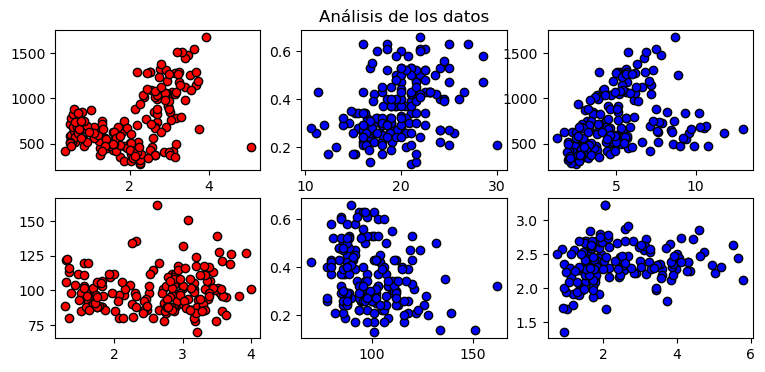

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(9, 4))

ax[0][0].scatter(
    x = variables[:,6],
    y = variables[:,12], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black', 
)
ax[0][1].set_title('Análisis de los datos')

ax[0][1].scatter(
    x = variables[:,3],
    y = variables[:,7], 
    c = 'blue',
    marker    = 'o',
    edgecolor = 'black', 
)

ax[0][2].scatter(
    x = variables[:,9],
    y = variables[:,12], 
    c = 'blue',
    marker    = 'o',
    edgecolor = 'black', 
)


ax[1][0].scatter(
    x = variables[:,11],
    y = variables[:,4], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black', 
)

ax[1][1].scatter(
    x = variables[:,4],
    y = variables[:,7], 
    c = 'blue',
    marker    = 'o',
    edgecolor = 'black', 
)

ax[1][2].scatter(
    x = variables[:,1],
    y = variables[:,2], 
    c = 'blue',
    marker    = 'o',
    edgecolor = 'black', 
)

## P 1.01 Eliminación de variables o clases no significativas

#### Algoritmo RFE - Recursive Feature Elimination por Feature-engine
<p>En este modelo las funciones se eliminan en función de una caída en el rendimiento del clasificador o del modelo de regresión. El rendimiento se mide por cualquier métrica de rendimiento del modelo de interés. </p>

### Proceso: 

<li> Entrenar un modelo de aprendizaje automático </li>
<li> Derivar la importancia de la característica </li>
<li> Eliminar las características menos importantes </li>
<li> Volver a entrenar el modelo de aprendizaje automático en las funciones restantes. </li>
<li> Calcular el cambio de rendimiento del segundo modelo con respecto al anterior. </li>
<li> Si el rendimiento disminuye más allá de un cierto umbral, mantenga la característica de 3. </li>
<li> Repita los pasos 3 a 6 hasta que se hayan evaluado todas las funciones. </li>

En resumen, en la implementación de RFE de Scikit-learn, eliminaríamos la función de menor importancia. Con Feature-engine, eliminaríamos una función si su eliminación redujera el rendimiento del modelo de aprendizaje automático. En Feature-engine, la importancia de la función se usa solo para determinar el orden en el que se eliminarán las funciones y, por lo tanto, se evaluarán.

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from feature_engine.selection import RecursiveFeatureElimination

In [57]:
X = dataset.iloc[:,1:] # Variables independientes (X)
y = dataset.iloc[:,0] # Variables dependientes (y)x


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
model = GradientBoostingRegressor(
    n_estimators=7,
    random_state=10,
)
RFE_model = RecursiveFeatureElimination(
    estimator = model, # the ML model
    scoring = 'r2', 
    threshold = 0.001, 
    cv=2,
)
RFE_model.fit(X_train, y_train)


RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingRegressor(n_estimators=7,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

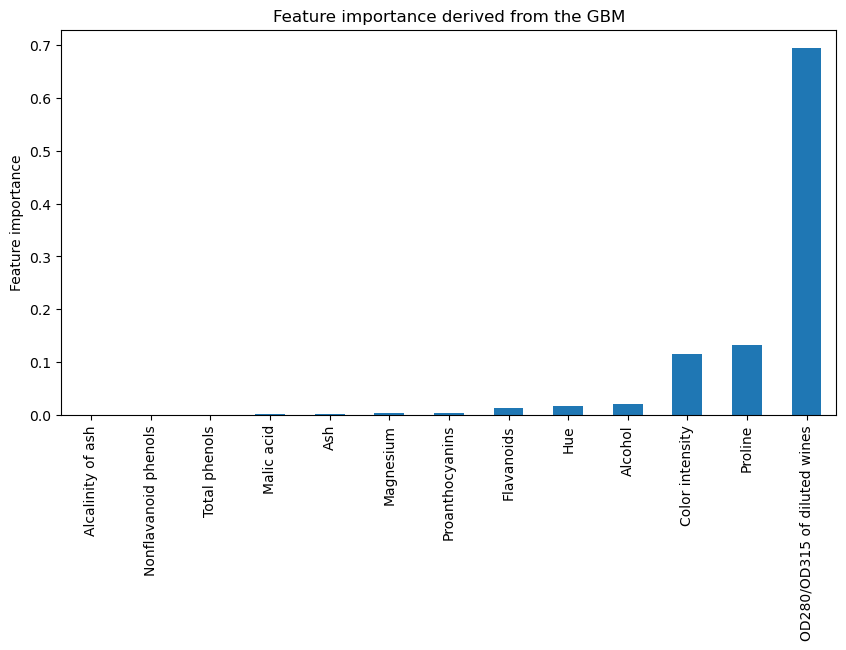

In [59]:
RFE_model.feature_importances_.plot.bar(figsize=(10, 5)) # muestra la importancia de las características derivadas del modelo de regresión
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

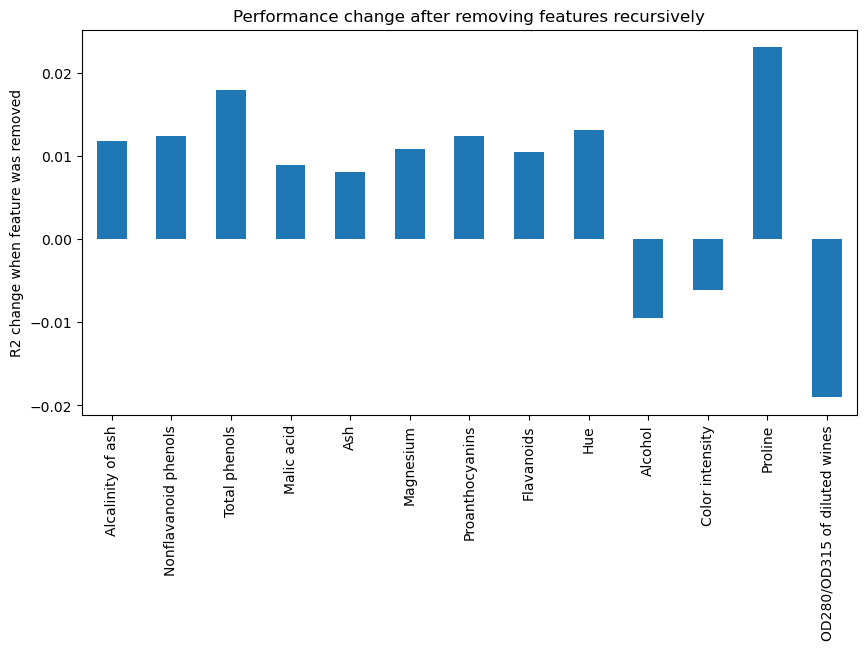

In [60]:
# Grafica los cambios en el R2 causados ​​por la eliminación de características
pd.Series(RFE_model.performance_drifts_).plot.bar(figsize=(10, 5))
plt.title('Performance change after removing features recursively')
plt.ylabel('R2 change when feature was removed')
plt.show()

In [61]:
RFE_model.features_to_drop_

['Alcohol', 'Color intensity', 'OD280/OD315 of diluted wines']

In [62]:
X_train_t = RFE_model.transform(X_train)
X_test_t = RFE_model.transform(X_test)

In [63]:
X_train_t.columns

Index(['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue',
       'Proline'],
      dtype='object')

### Referencias: 

<li> https://www.blog.trainindata.com/recursive-feature-elimination-with-python/#:~:text=Recursive%20feature%20elimination%20(RFE)%20is,a%20time%2C%20iteration%20after%20iteration.</li>

### P3. Algoritmo Naive bayes

<b> Objetivo: </b> Analis de predicción por naive bayes, el cual busca predecir la clasificación del tipo de vino con respecto a sus parametros.

In [77]:
## Reordenamos las variables de la tabla.

Data = dataset[['Clase','Proline','Alcohol','Hue', 'Color intensity', 'OD280/OD315 of diluted wines','Flavanoids']]

"""[["Clase",'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue',
       'Proline']]
"""

variables = Data.iloc[:,1:].values # Variables independientes (X)
resultado = Data.iloc[:,0].values # Variables dependientes (y)x


In [78]:
### Split de datos en training y testing set.
X_train, X_test, y_train, y_test =train_test_split(variables,resultado,test_size=0.20, random_state=5)
X_train.shape, X_test.shape

((142, 6), (36, 6))

#### 3.1 Entrenamiento del modelo

In [79]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

#### 3.2 Predicción del modelo

In [80]:
# Predicción de resultados
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 3, 3, 1, 2, 2, 1, 1, 3, 3], dtype=int64)

#### 3.3 Precisión de Resultados del Modelo

In [82]:
# Medición del accuracy del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Modelo anterior (0.9167)
# Modelo actual 0.8889
# Modelo recupera cuando selecciono las variables en función de la importancia en lugar del performance

Model accuracy score: 0.9167


In [83]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training-set accuracy score: 0.9859
Training set score: 0.9859
Test set score: 0.9167


### 4 Matriz de Confusión

In [84]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15  2  0]
 [ 1 10  0]
 [ 0  0  8]]

True Positives(TP) =  15

True Negatives(TN) =  10

False Positives(FP) =  2

False Negatives(FN) =  1


<Axes: >

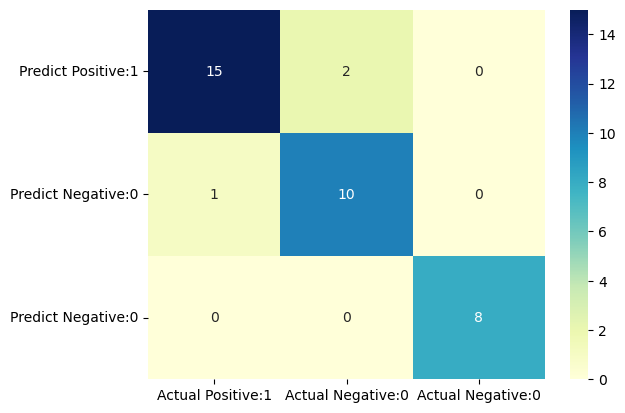

In [85]:
# Vsializar la confusion matrix con seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [12]:
## Guardando el modelo entrenado en un nuevo archivo.

#joblib.dump(gnb, 'wineNaiveBayes.pkl') # Guardo el modelo.


['wineNaiveBayes.pkl']

## 5. Predicción del modelo


<b> Objetivo: </b> Se Generan 4 valores de prueba para utilizar el modelo entrenado, a cada valor le llamamos vector.

In [87]:
## Valores de prueba

Vector2= [[1065,14.23,1.04,5.64,3.92,3.06]] #Clasif 1
Vector4 =[[840,13.17,0.60,9.30,1.62,0.68]] # Clasif = 3 

<b> Ejecución del modelo </b> Muestra el resultado de la predicción del modelo

In [88]:
Clasificación = gnb.predict(Vector4)
print("La categoria del vino es :",Clasificación)

La categoria del vino es : [3]


## Ejecución de Analisis de componentes principales

<p> Aunque la predicción ha sido satisfactoria, se propone realizar un modelo de analisis de componentes principales con el 
objetivo de conocer si el numero de variables es la adecuada o se puede disminuir el numero de varibles. 
</p>

In [89]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Se renombran el dataset
dataFrame = dataset.iloc[:,1:]

## Modelo PCA

In [91]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataFrame)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [92]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataFrame.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4'
              ,'PC5'
              ,'PC6'
              ,'PC7'
              ,'PC8'
              ,'PC9'
              ,'PC10'
              ,'PC11'
              ,'PC12'
              ,'PC13'
              ]
)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
PC9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
PC10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


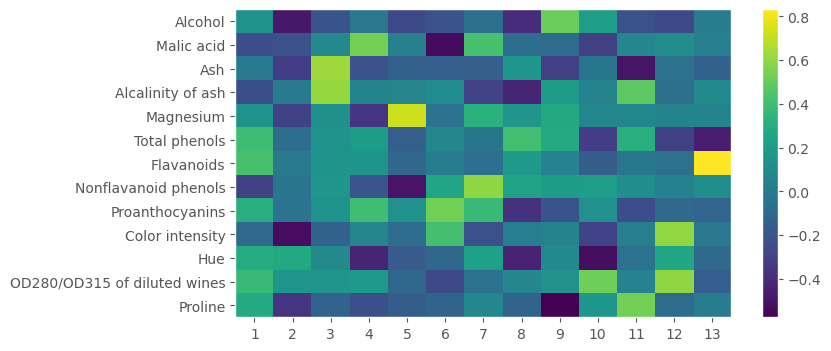

In [93]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataFrame.columns)), dataFrame.columns)
plt.xticks(range(len(dataFrame.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


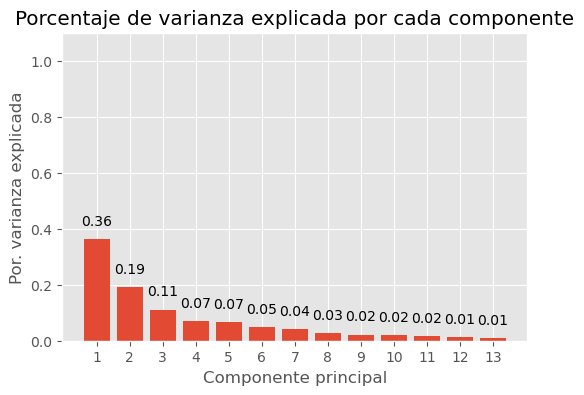

In [94]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dataFrame.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


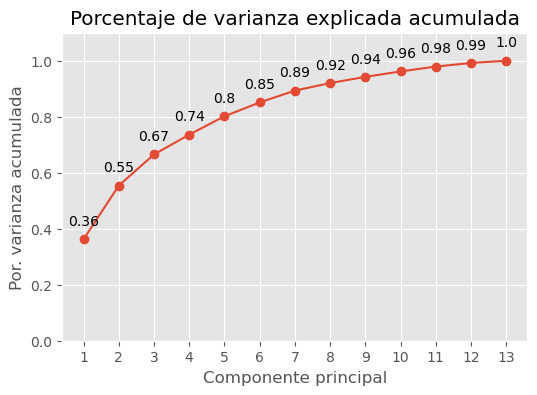

In [95]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(dataFrame.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataFrame.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Transformación


In [96]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataFrame)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'
              ,'PC5'
              ,'PC6'
              ,'PC7'
              ,'PC8'
              ,'PC9'
              ,'PC10'
              ,'PC11'
              ,'PC12'
              ,'PC13'
              ],
    index   = dataFrame.index
)



proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


## Aproximación a una regresión lineal

In [97]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [98]:
# preprocesamiento de las variables dependientes e independientes

X = variables
y = resultado

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True)

# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)


# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.29004844363667204


### Agregando el modelo de PCA al modelo de regresión

In [99]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [100]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.2933459774474129


In [103]:
# prueba del algoritmo

print("La predicción es: ", pipe_modelado.predict(X=Vector2))# == 1
print("La predicción es: ", pipe_modelado.predict(X=Vector4))# == 3


La predicción es:  [[0.88229968]]
La predicción es:  [[2.87175131]]


## Implementación del algoritmo EM

In [27]:
# Normalizando los datos
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(dataFrame)

In [28]:
names=["Alcohol","Malic acid","Ash","Alcalinity of ash",
                                                         "Magnesium","Total phenols","Flavanoids",
                                                         "Nonflavanoid phenols","Proanthocyanins",
                                                         "Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]

data = pd.DataFrame(x_minmax, columns=names)

In [29]:
# Cargando las librerias

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from plotnine import ggplot, aes, geom_line, geom_point

%matplotlib inline

In [30]:
## Definiendo las dimensiones

# Todas las columnas
names = ["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids",
                                                         "Nonflavanoid phenols","Proanthocyanins",
                                                         "Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
# Solo dos columnas
features = ["Alcohol","Color intensity"]

### Clasificando en Dos dimensiones

silhouette:  0.42173430963908354


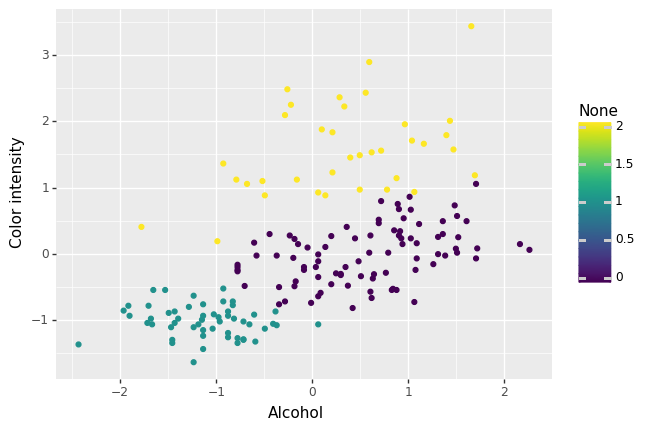

<ggplot: (138845021727)>

In [46]:
X = data[features]
z = StandardScaler()

X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3)
EM.fit(X)

cluster = EM.predict(X)
print("silhouette: ", silhouette_score(X, cluster))

X['cluster'] = cluster
(ggplot(X, aes(x = "Alcohol", y = "Color intensity", color = cluster)) + geom_point())

### Clasificando Dimensiones multiples

In [47]:
X = data[names]
z = StandardScaler()

X[names] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3)
EM.fit(X)

cluster = EM.predict(X)


In [48]:
# Predicción de la clasificación
print("Predicción es; ",cluster)
print("silhouette: ", silhouette_score(X, cluster))

Predicción es;  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
silhouette:  0.2844212860533542


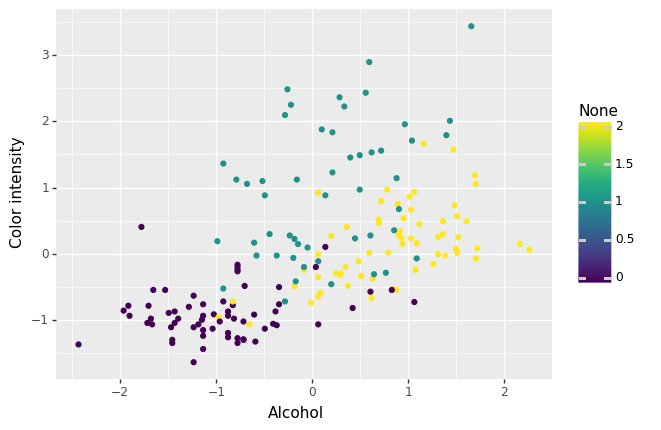

<ggplot: (138847829983)>

In [49]:
# EM.predict_proba(X) # Imprime la probabilidad de cada cluster
X['cluster'] = cluster
(ggplot(X, aes(x = "Alcohol", y = "Color intensity", color = cluster)) + geom_point())


## Verificar la presición de la clasificación

In [54]:
# Modificamos los valores del resultado de la clasificación que va de un rango de 0 a 2 a un rango de 1 a 3. 

y_predict = []
for i in cluster:
    if i == 1:
        y_predict.append(1)
    elif i == 0:
        y_predict.append(2)
    elif i == 2:
        y_predict.append(3)

In [55]:
# Medición del accuracy del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(resultado, y_predict)))

Model accuracy score: 0.3596


In [56]:
cm2 = confusion_matrix(resultado, y_predict)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[14  3  0]
 [ 0 11  0]
 [ 0  0  8]]

True Positives(TP) =  14

True Negatives(TN) =  11

False Positives(FP) =  3

False Negatives(FN) =  0


<AxesSubplot:>

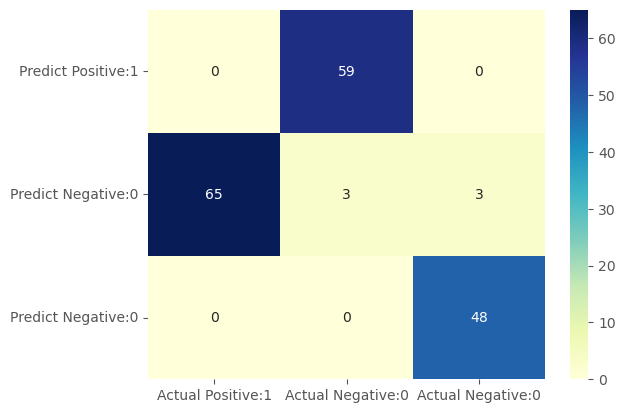

In [38]:
# Vsializar la confusion matrix con seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Incluyendo en un modelo de entrenamiento

In [39]:
## Estandarizando los datos 

X = data[names]
z = StandardScaler()
X[names] = z.fit_transform(X)
variables = X

In [40]:
### Split de datos en training y testing set.
X_train, X_test, y_train, y_test =train_test_split(variables,resultado,test_size=0.20, random_state=5)
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [41]:
EM = GaussianMixture(n_components = 3)

# fit the model
EM.fit(X_train, y_train)

# Predicción de resultados
y_pred = EM.predict(X_test)
y_pred

# Reclasificación de los datos
y_predc = []
for i in y_pred:
    if i == 1:
        y_predc.append(1)
    elif i == 0:
        y_predc.append(2)
    elif i == 2:
        y_predc.append(3)


# Medición del accuracy del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predc)))


Model accuracy score: 0.9722


In [42]:
res = confusion_matrix(y_test, y_predc)
print('Confusion matrix\n\n', res)
print('\nTrue Positives(TP) = ', res[0,0])
print('\nTrue Negatives(TN) = ', res[1,1])
print('\nFalse Positives(FP) = ', res[0,1])
print('\nFalse Negatives(FN) = ', res[1,0])

Confusion matrix

 [[17  0  0]
 [ 1 10  0]
 [ 0  0  8]]

True Positives(TP) =  17

True Negatives(TN) =  10

False Positives(FP) =  0

False Negatives(FN) =  1


<AxesSubplot:>

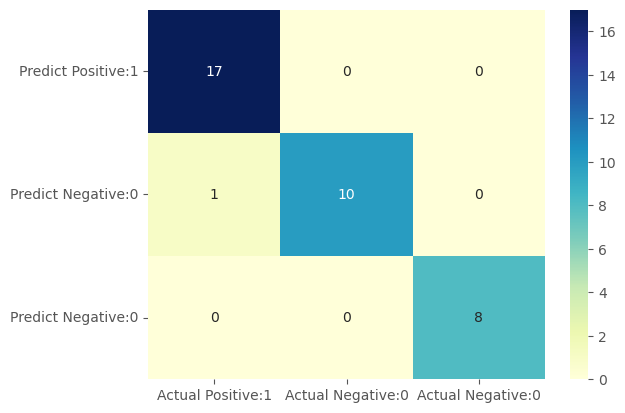

In [43]:
cm_matrix = pd.DataFrame(data=res, columns=['Actual Positive:1', 'Actual Negative:0', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

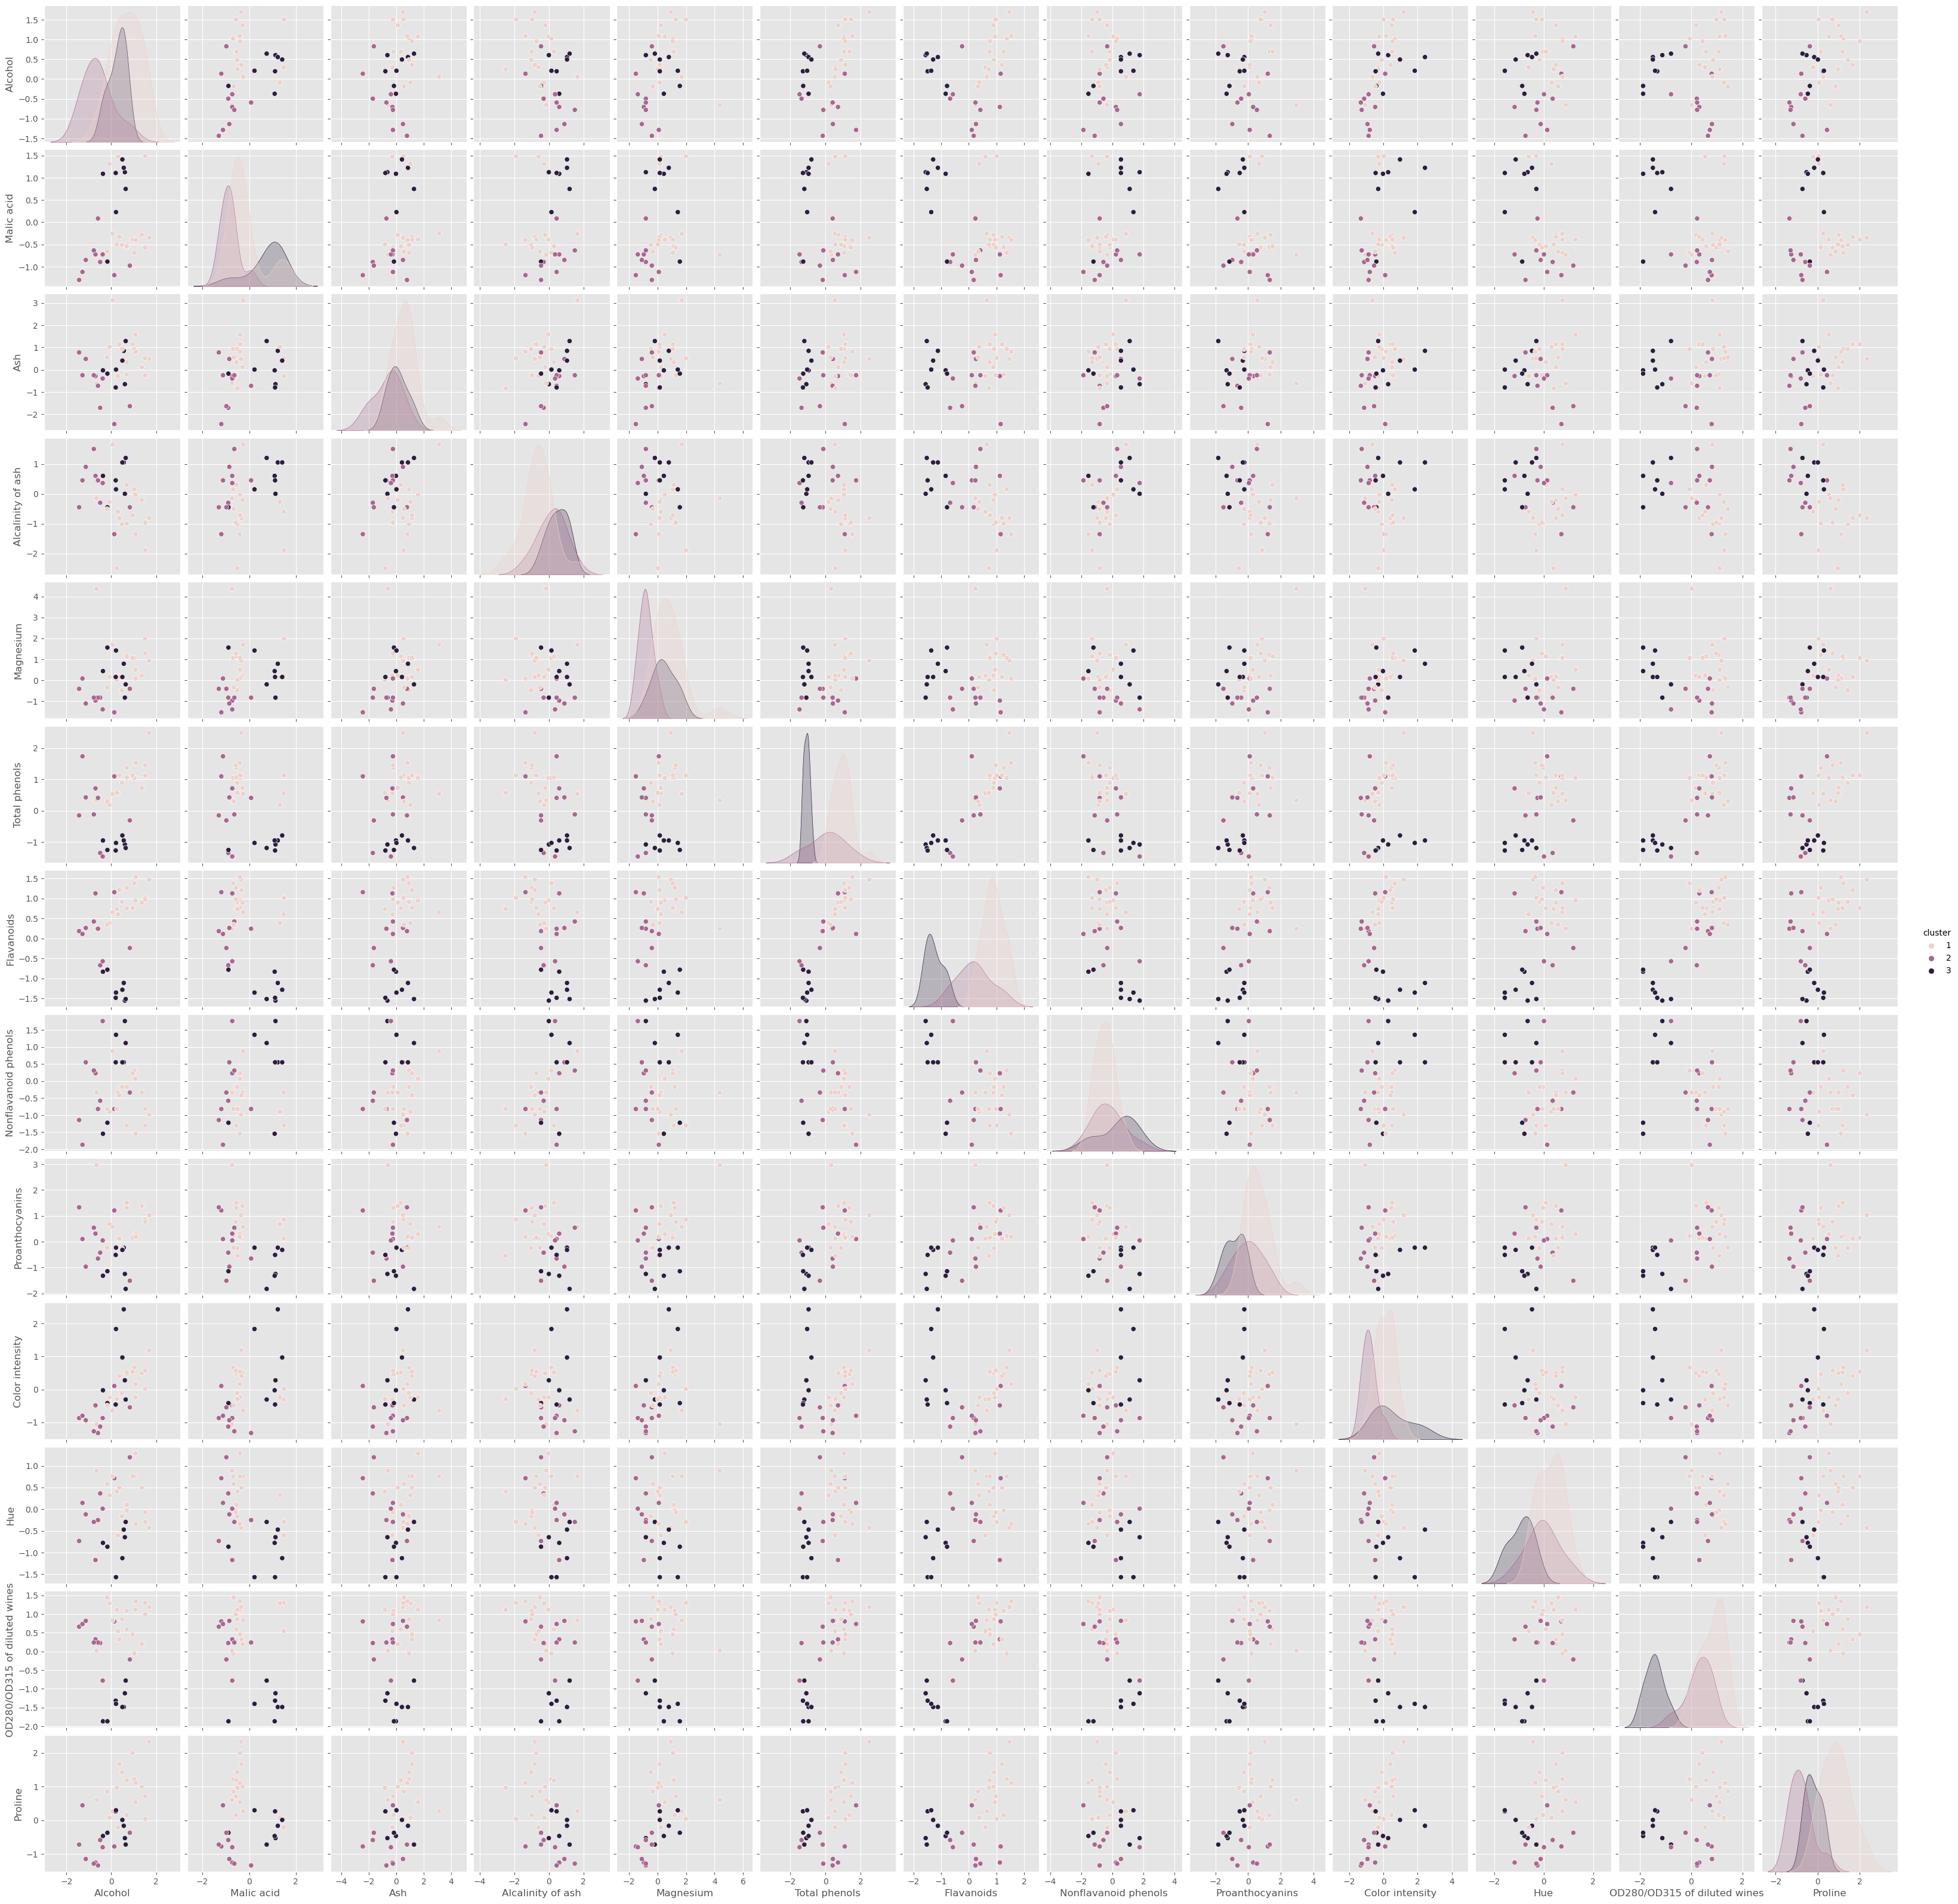

In [44]:
# Graficación multiple
import seaborn

# Función de predicción
Varr = X_test
Varr['cluster'] = y_predc

# pairplot with hue sex
seaborn.pairplot(Varr, hue ="cluster")
# to show
plt.show()

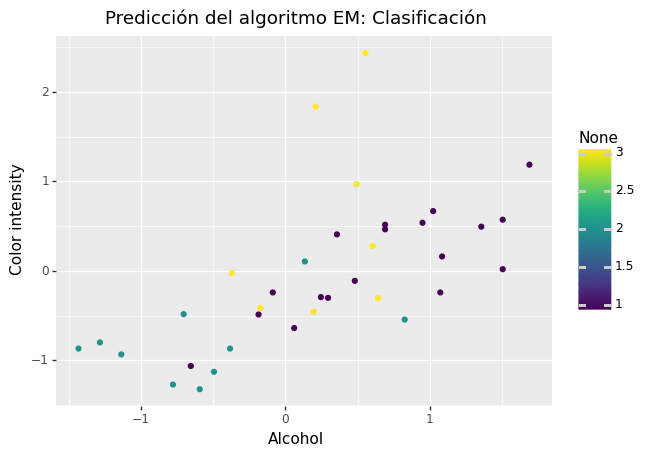

<ggplot: (138845013649)>

In [45]:
############# Main Section ############

from plotnine import labs

# Grafica de dos dimensiones
cluster = y_predc
(
    ggplot(Varr, aes(x = "Alcohol", y = "Color intensity", color = cluster)) 
    + geom_point()
    + labs(title="Predicción del algoritmo EM: Clasificación")
)